In [2]:
print("Experimenting with EMG Data")

Experimenting with EMG Data


# Data Preprocessing

## Create CSV File from Data

### Step 1: Import Libraries

In [3]:
from pathlib import Path

import os
import pandas as pd

### Step 2: Set the Path to master folder
Adjust this path to where you've saved the EMG data

In [4]:
master_folder = Path("EMG_data_for_gestures-master")

### Step 3: Iterate through subfolders and read each TXT file
Loop through each subfolder, read text files, and concatenate data.

In [5]:
all_data = []
file_count = 0

for i in range(1, 37):
    f_num = i
    subfolder = os.path.join(master_folder, str(f_num))
    if f_num < 10:
        subfolder = os.path.join(master_folder, "0" + str(f_num))

    for filename in os.listdir(subfolder):
        if filename.endswith(".txt"):
            filepath = os.path.join(subfolder, filename)
            data = pd.read_csv(filepath, delim_whitespace=True)
            data["subject_number"] = i
            data = data[data["class"] != 0] # Exclude rows where class is 0
            all_data.append(data)

### Step 4: Concatenate all data and save to CSV
Concatenate all data into single DataFrame and save as CSV file

In [6]:
combined_data = pd.concat(all_data, ignore_index=True)
combined_data.to_csv("EMG_gestures_data.csv", index=False)

## Preprocess Data

In [7]:
combined_data.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,subject_number
0,2400,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1.0,1
1,2401,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1
2,2402,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1
3,2403,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1
4,2404,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1


In [8]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512751 entries, 0 to 1512750
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   time            1512751 non-null  int64  
 1   channel1        1512751 non-null  float64
 2   channel2        1512751 non-null  float64
 3   channel3        1512751 non-null  float64
 4   channel4        1512751 non-null  float64
 5   channel5        1512751 non-null  float64
 6   channel6        1512751 non-null  float64
 7   channel7        1512751 non-null  float64
 8   channel8        1512751 non-null  float64
 9   class           1512750 non-null  float64
 10  subject_number  1512751 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 127.0 MB


In [9]:
combined_data["class"].value_counts()

class
6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
7.0     13696
Name: count, dtype: int64

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'channel1'}>,
        <Axes: title={'center': 'channel2'}>],
       [<Axes: title={'center': 'channel3'}>,
        <Axes: title={'center': 'channel4'}>,
        <Axes: title={'center': 'channel5'}>],
       [<Axes: title={'center': 'channel6'}>,
        <Axes: title={'center': 'channel7'}>,
        <Axes: title={'center': 'channel8'}>],
       [<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'subject_number'}>, <Axes: >]],
      dtype=object)

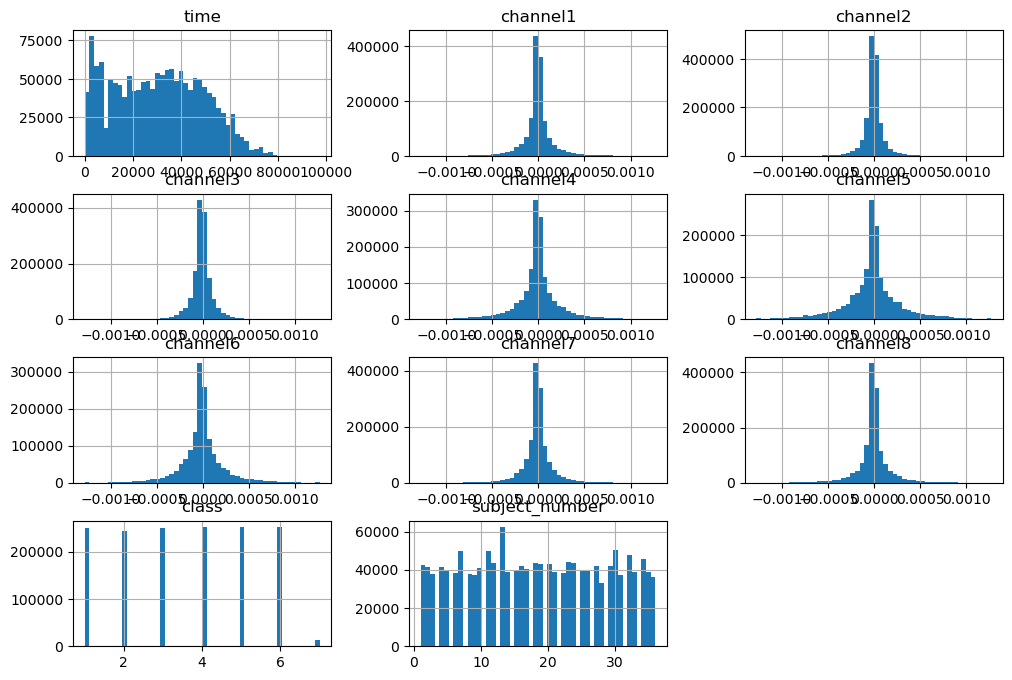

In [10]:
import matplotlib as plt

combined_data.hist(bins=50, figsize=(12,8))

## Create Test Set

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(combined_data, test_size=0.2, random_state=42)

print("Length of train set:", len(train_set))
print("Length of test set:", len(test_set))

Length of train set: 1210200
Length of test set: 302551


# Visualizing Data

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Class-Specific Activation Profile Matrix

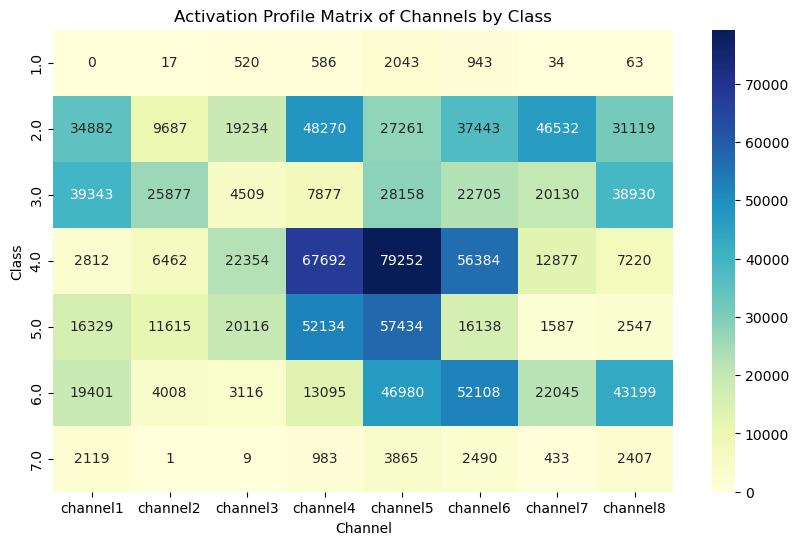

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define activation threshold (currently, values above mean + std deviation as 'activated')
activation_threshold = combined_data.iloc[:, 1:9].mean().mean() + combined_data.iloc[:, 1:9].std().mean()

# Calculate class-specific activation counts
activation_counts = pd.DataFrame(0, index=data['class'].unique(), columns=[f'channel{i}' for i in range(1, 9)])

for cls in combined_data['class'].unique():
    if np.isnan(cls): continue
    cls_data = combined_data[combined_data['class'] == cls].iloc[:, 1:9]  # Exclude 'class' column
    cls_activations = (cls_data > activation_threshold).sum()
    activation_counts.loc[cls] = cls_activations.values

# Plot the activation profile matrix
plt.figure(figsize=(10, 6))
sns.heatmap(activation_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Activation Profile Matrix of Channels by Class")
plt.xlabel("Channel")
plt.ylabel("Class")
plt.show()